In [3]:
import pandas as pd

df = pd.read_csv('../billboard_hot_100_sentiment.csv')

df[['rank', 'peak_rank', 'weeks_on_chart']].describe()


,rank,peak_rank,weeks_on_chart
count,99.000000,99.000000,99.000000
mean,50.333333,31.313131,15.929293
std,29.110977,25.292028,18.607247
min,1.000000,1.000000,1.000000
25%,25.500000,8.000000,4.000000
50%,50.000000,28.000000,11.000000
75%,75.500000,52.000000,18.500000
max,100.000000,87.000000,102.000000


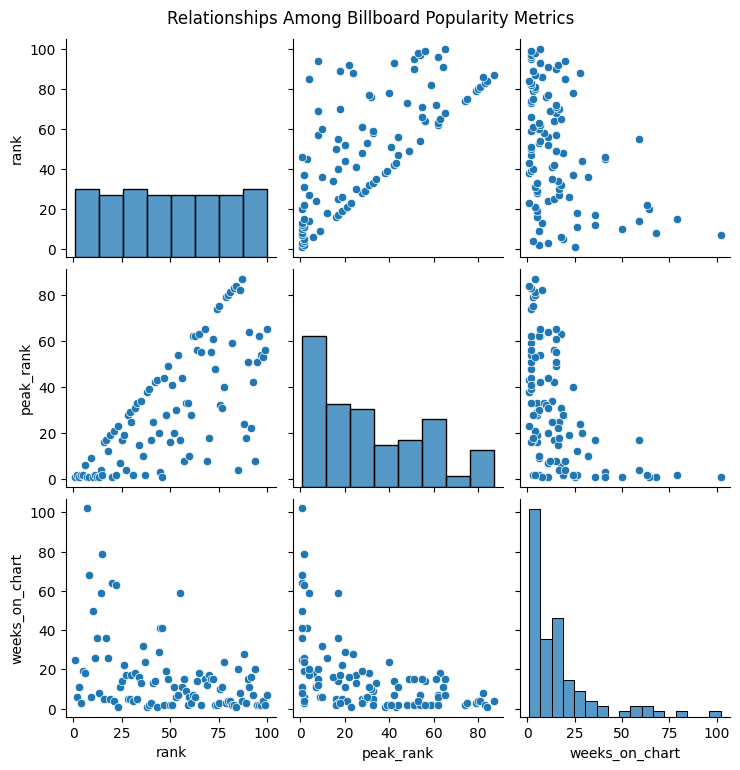

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.pairplot(df[['rank', 'peak_rank', 'weeks_on_chart']])
plt.suptitle('Relationships Among Billboard Popularity Metrics', y=1.02)
plt.show()


In [5]:
df[['word_count', 'lyric_length']].describe()


,word_count,lyric_length
count,99.000000,99.000000
mean,376.373737,391.515152
std,135.945786,139.478867
min,109.000000,150.000000
25%,301.500000,314.500000
50%,344.000000,350.000000
75%,415.000000,432.000000
max,843.000000,892.000000


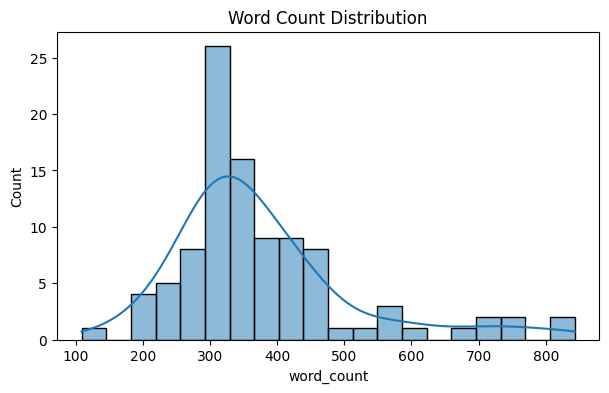

In [6]:
plt.figure(figsize=(7, 4))

sns.histplot(df['word_count'], bins=20, kde=True)
plt.title('Word Count Distribution')
plt.show()

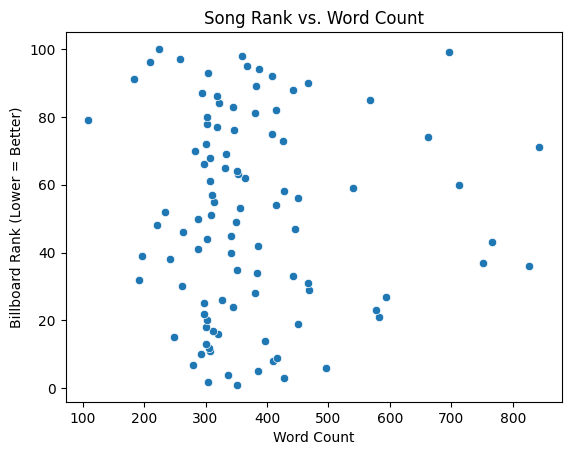

In [7]:
sns.scatterplot(x='word_count', y='rank', data=df)
plt.title('Song Rank vs. Word Count')
plt.xlabel('Word Count')
plt.ylabel('Billboard Rank (Lower = Better)')
plt.show()

In [8]:
df['top_emotion'].value_counts()

top_emotion
sadness     25
neutral     22
fear        20
anger       17
joy          7
disgust      4
surprise     4
Name: count, dtype: int64

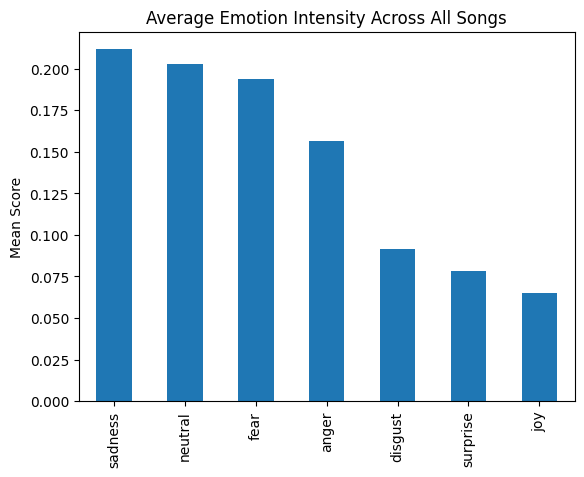

In [9]:
# Compare average emotion scores
emotion_names = ['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise']
avg_emotions = df[emotion_names].mean().sort_values(ascending=False)

avg_emotions.plot(kind='bar')
plt.title('Average Emotion Intensity Across All Songs')
plt.ylabel('Mean Score')
plt.show()

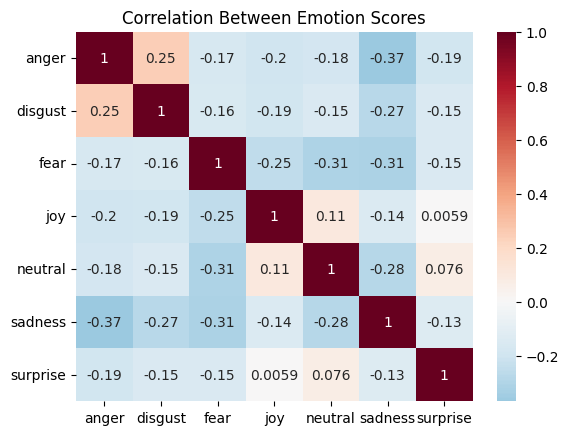

In [10]:
corr = df[emotion_names].corr()
sns.heatmap(corr, annot=True, cmap='RdBu_r', center=0)
plt.title('Correlation Between Emotion Scores')
plt.show()


C:\Users\danny\AppData\Local\Temp\ipykernel_9396\1654082936.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  emotion_by_rank = df.groupby('rank_group')[emotion_names].mean()


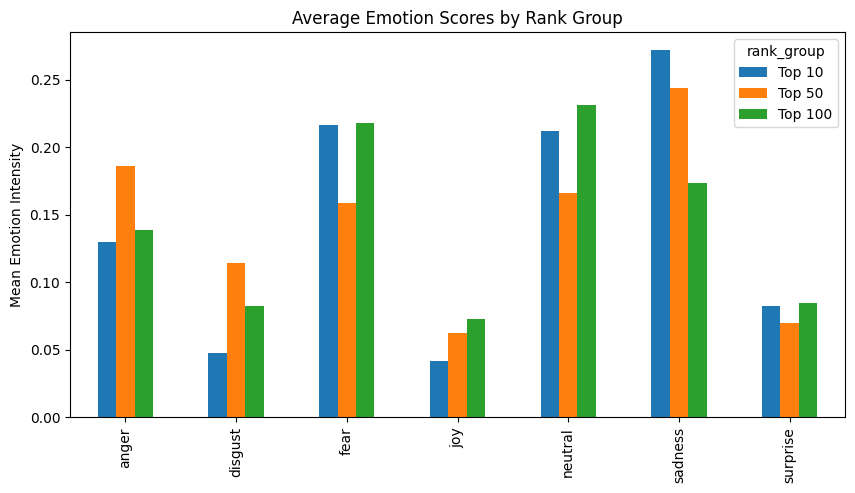

In [11]:
# Define rank groups
df['rank_group'] = pd.cut(df['rank'], bins=[0,10,50,100], labels=['Top 10','Top 50','Top 100'])

# Average emotion intensity per group
emotion_by_rank = df.groupby('rank_group')[emotion_names].mean()
emotion_by_rank.T.plot(kind='bar', figsize=(10,5))
plt.title('Average Emotion Scores by Rank Group')
plt.ylabel('Mean Emotion Intensity')
plt.show()


In [12]:
import re
import nltk
from nltk.corpus import stopwords
from better_profanity import profanity

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Clean stop words and profanity
def clean_stop_words(text):
    text = re.sub(r'[^a-zA-Z\s]', '', str(text))  # remove punctuation/numbers (anything not a letter or space)
    text = text.lower()
    words = [w for w in text.split() if w not in stop_words and not profanity.contains_profanity(w) and len(w) > 2]
    return words

df['important_words'] = df['lyrics'].apply(clean_stop_words)
df[['title', 'important_words']].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danny\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,title,important_words
0,Ordinary,"[say, holy, waters, watered, towns, lost, fait..."
1,Golden,"[ghost, alone, hah, given, throne, didnt, know..."
2,What I Want,"[said, dont, want, heart, boy, already, broke,..."
3,Daisies,"[throwin, petals, like, love, head, spinnin, d..."
4,Just In Case,"[aint, sayin, always, sleep, alone, aint, sayi..."


In [13]:
# Get all words in all songs
all_words = [word for important_words in df['important_words'] for word in important_words]

# Convert to Series and use value_counts()
words_freq = pd.Series(all_words).value_counts().head(25)

# Convert to DataFrame
words_df = words_freq.reset_index()
words_df.columns = ['Word', 'Frequency']
words_df


,Word,Frequency
0,dont,311
1,like,279
2,yeah,255
3,know,217
4,get,197
5,baby,195
6,got,184
7,aint,176
8,party,169
9,youre,143


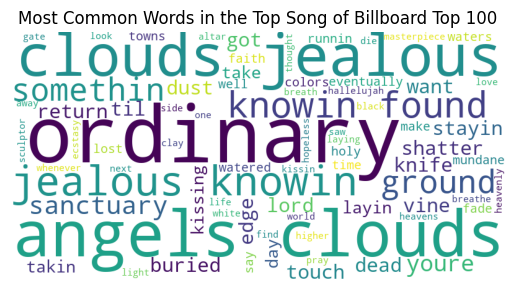

In [14]:
from wordcloud import WordCloud

number_1_song_words = ' '.join(df['important_words'][0])
wc2 = WordCloud(width=800, height=400, background_color='white').generate(number_1_song_words)

plt.imshow(wc2)
plt.axis('off') # removes x/y axes
plt.title('Most Common Words in the Top Song of Billboard Top 100')
plt.show()

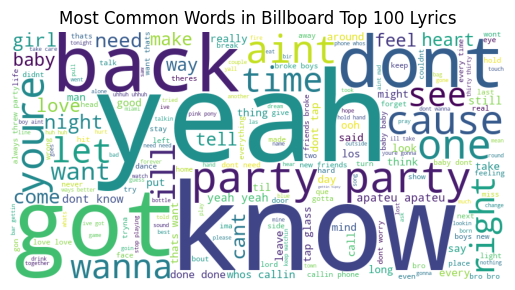

In [15]:
text = ' '.join(all_words)
wc = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.imshow(wc)
plt.axis('off') # removes x/y axes
plt.title('Most Common Words in Billboard Top 100 Lyrics')
plt.show()


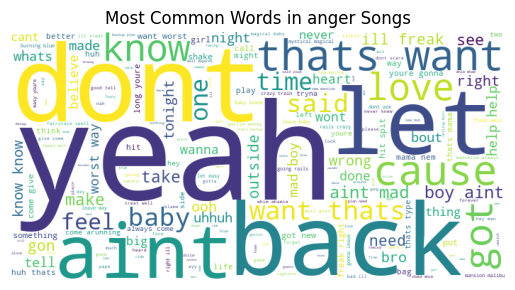

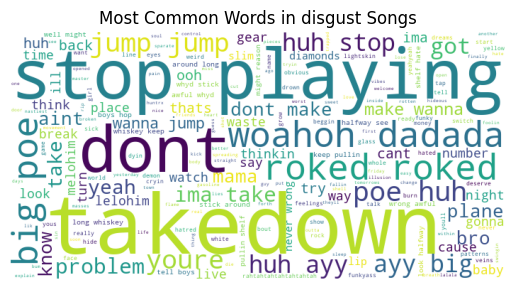

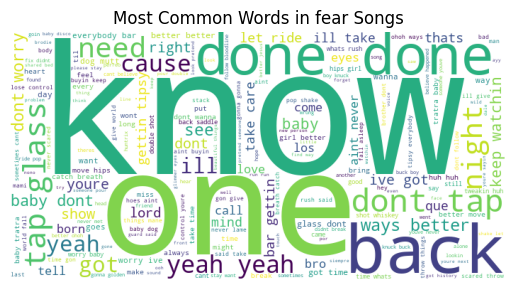

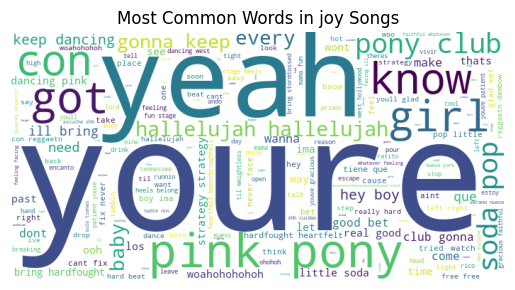

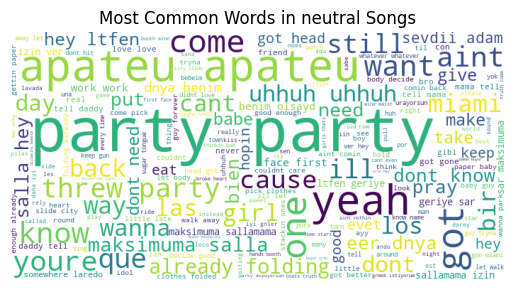

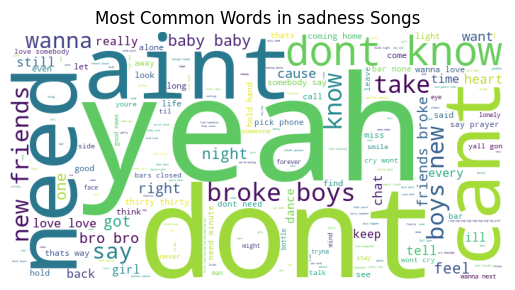

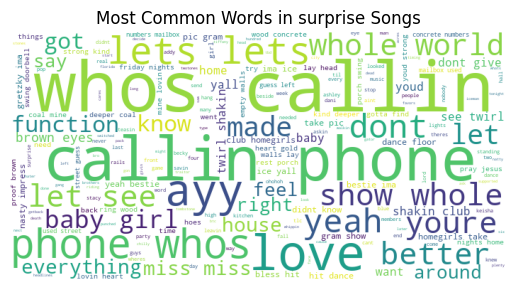

In [16]:
for emotion in ['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise']:
    # Collect all words from songs with that emotion having the top sentiment score
    emotion_words = [' '.join(words) for words in df[df['top_emotion'] == emotion]['important_words']]

    text = ' '.join(emotion_words)
    wc3 = WordCloud(width=700, height=350, background_color='white').generate(text)

    plt.figure()
    plt.imshow(wc3)
    plt.axis('off')
    plt.title(f'Most Common Words in {emotion} Songs')
    plt.show()